<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_4327/3651244348.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num['Age'] = df['Age'].replace({


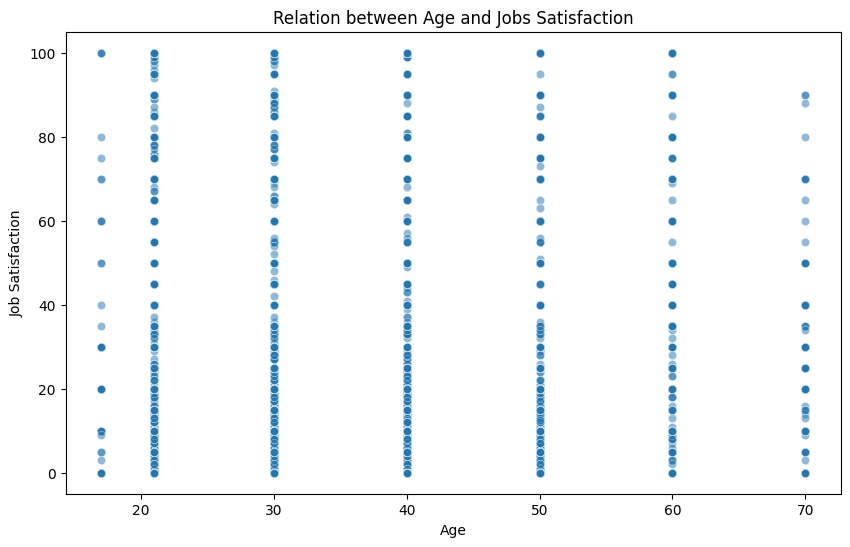

In [4]:
#change the categorical values into numerical and drop null values
df_num=df.copy()
df_num['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  
})
df_num_clean = df_num[['Age', 'JobSatPoints_6']].dropna()


#create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_num_clean, x='Age', y='JobSatPoints_6', alpha=0.5)


plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Relation between Age and Jobs Satisfaction')

plt.show()



#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


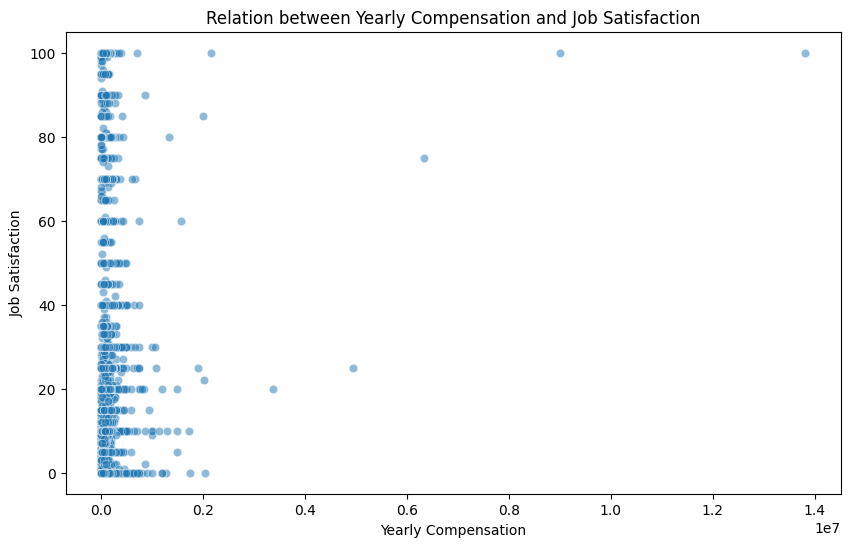

In [5]:
#create a new df 
df_comp_jobsat = df.copy()


# Drop rows where there are missing values in either 'ConvertedCompYearly' or 'JobSatPoints_6'
df_comp_jobsat = df_comp_jobsat[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

#create the plot
plt.figure(figsize=(10,6))
sns.scatterplot(data= df_comp_jobsat, x='ConvertedCompYearly', y = 'JobSatPoints_6', alpha = 0.5)


plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Relation between Yearly Compensation and Job Satisfaction')

plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


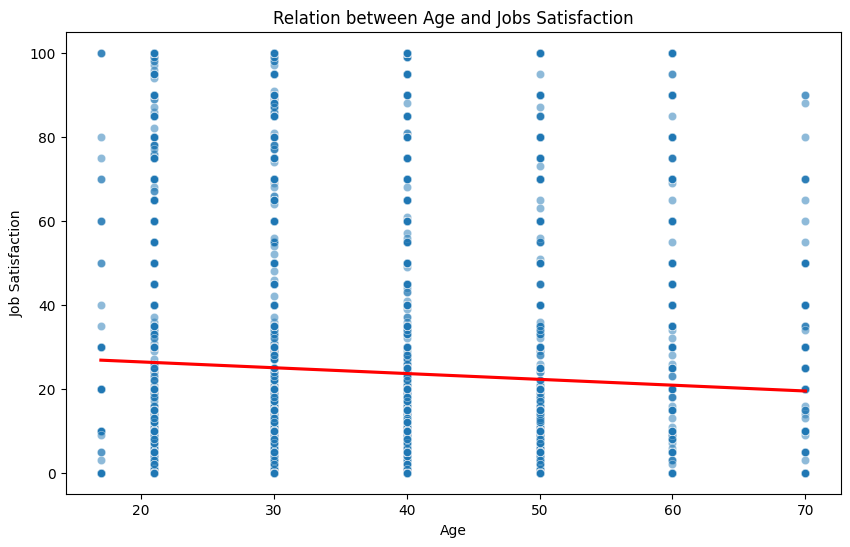

In [6]:
#create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_num_clean, x='Age', y='JobSatPoints_6', alpha=0.5)
#Regression Line
sns.regplot(data=df_num_clean, x='Age', y='JobSatPoints_6', scatter=False, ci=None, color='red')

plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Relation between Age and Jobs Satisfaction')

plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


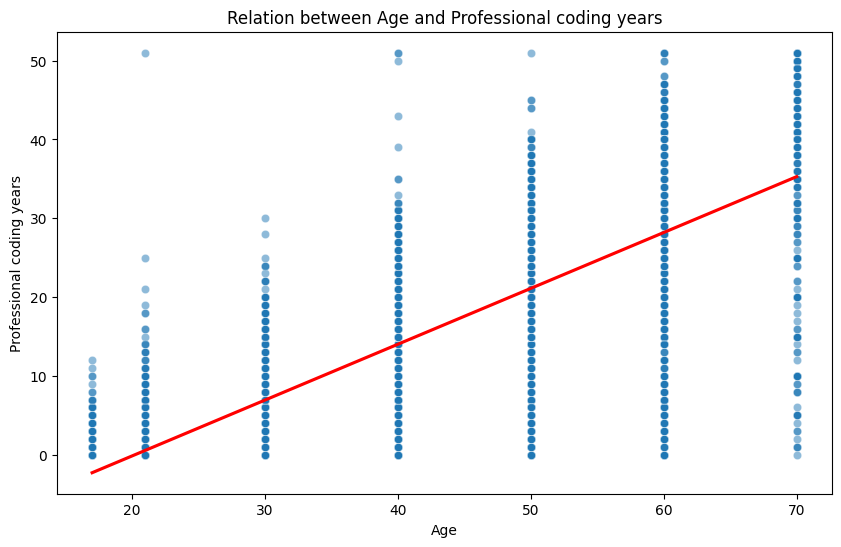

In [7]:
# Change the column into numeric values
df_num['YearsCodePro'] = df_num['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_num['YearsCodePro'] = pd.to_numeric(df_num['YearsCodePro'], errors='coerce')
#drop missing values
df_years_code = df_num[['Age', 'YearsCodePro']].dropna()
#create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_years_code, x='Age', y='YearsCodePro', alpha=0.5)
#trend line
sns.regplot(data=df_years_code, x='Age', y='YearsCodePro', scatter=False, ci=None, color='red')

plt.xlabel('Age')
plt.ylabel('Professional coding years')
plt.title('Relation between Age and Professional coding years')

plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


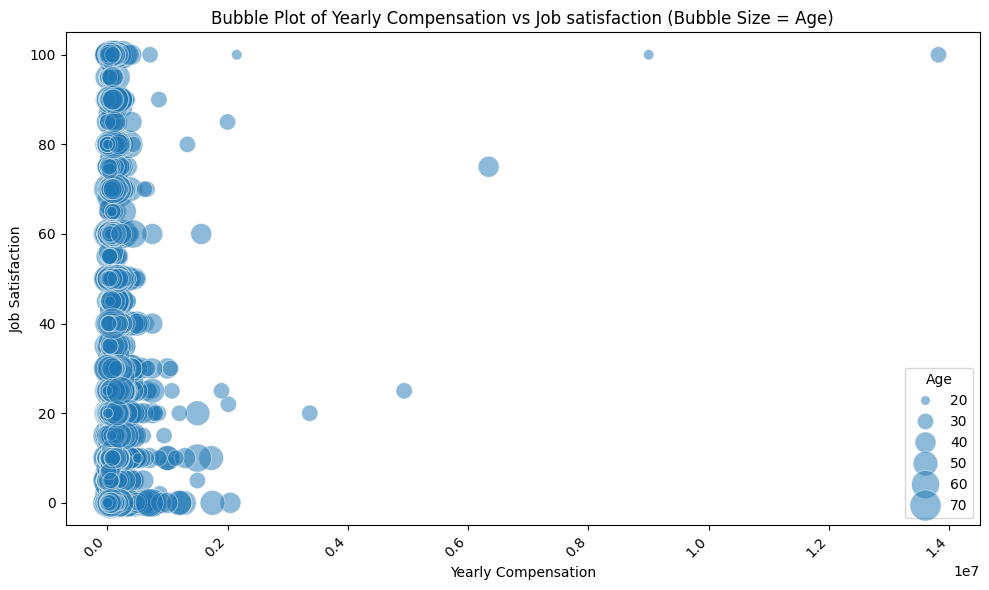

In [8]:
#new df
df_sat_comp =df_num.copy()

#drop missing values
df_sat_comp =df_sat_comp[['ConvertedCompYearly', 'JobSatPoints_6','Age']].dropna()
#create bubleplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sat_comp, x='ConvertedCompYearly', y='JobSatPoints_6', size='Age', sizes=(20, 500), alpha=0.5)

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot of Yearly Compensation vs Job satisfaction (Bubble Size = Age)')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


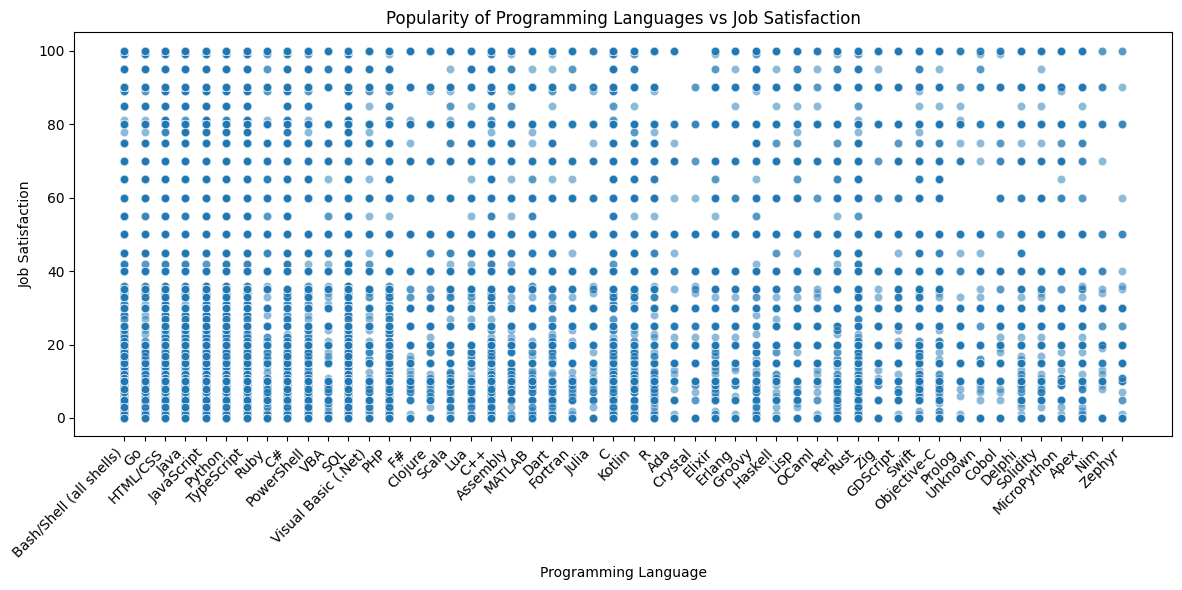

In [9]:
# Create a copy of the original DataFrame only with the relative columns
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()

# Replace missing values in the 'LanguageHaveWorkedWith' column
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].fillna('Unknown')
#drop missing values
df_lang = df_lang.dropna(subset=['JobSatPoints_6'])

# Separate the answers that contain multiple values
df_lang_split = df_lang['LanguageHaveWorkedWith'].str.split(';', expand=True)
df_lang_list = df_lang_split.stack().reset_index(drop=True)


# Get the corresponding JobSatPoints_6 for each entry 
job_sat_points = df_lang['JobSatPoints_6'].repeat(df_lang_split.shape[1]).reset_index(drop=True)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_lang_list, y=job_sat_points, alpha=0.5)

plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction')
plt.title('Popularity of Programming Languages vs Job Satisfaction')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


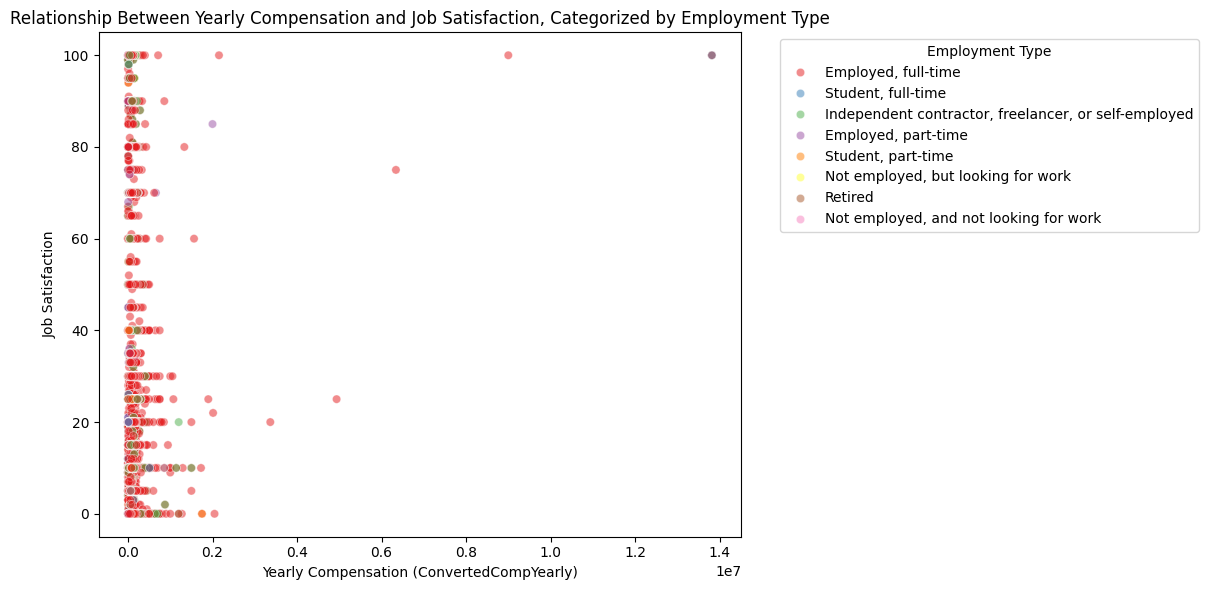

In [10]:
# Create a copy of the original DataFrame to work with the data
df_employment_comp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# Split the employment types in the 'Employment' column by ';'
df_employment_comp['Employment_split'] = df_employment_comp['Employment'].str.split(';')

# Explode to make each employment type occupy a separate row
df_exploded = df_employment_comp.explode('Employment_split').reset_index(drop=True)

# Remove extra spaces around the values in 'Employment_split'
df_exploded['Employment_split'] = df_exploded['Employment_split'].str.strip()

# Create the scatter plot with color based on Employment_split
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_exploded, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment_split', palette='Set1', alpha=0.5)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Yearly Compensation and Job Satisfaction, Categorized by Employment Type')

plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_4327/1996659954.py:14: UserWarning: 
The markers list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_combined, x='YearsCodePro', y='Age', hue='Country', style='AgeGroup', palette='Set1', markers=['o', 's', 'D', '^', 'v', 'p'], alpha=0.7)
/tmp/ipykernel_4327/1996659954.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


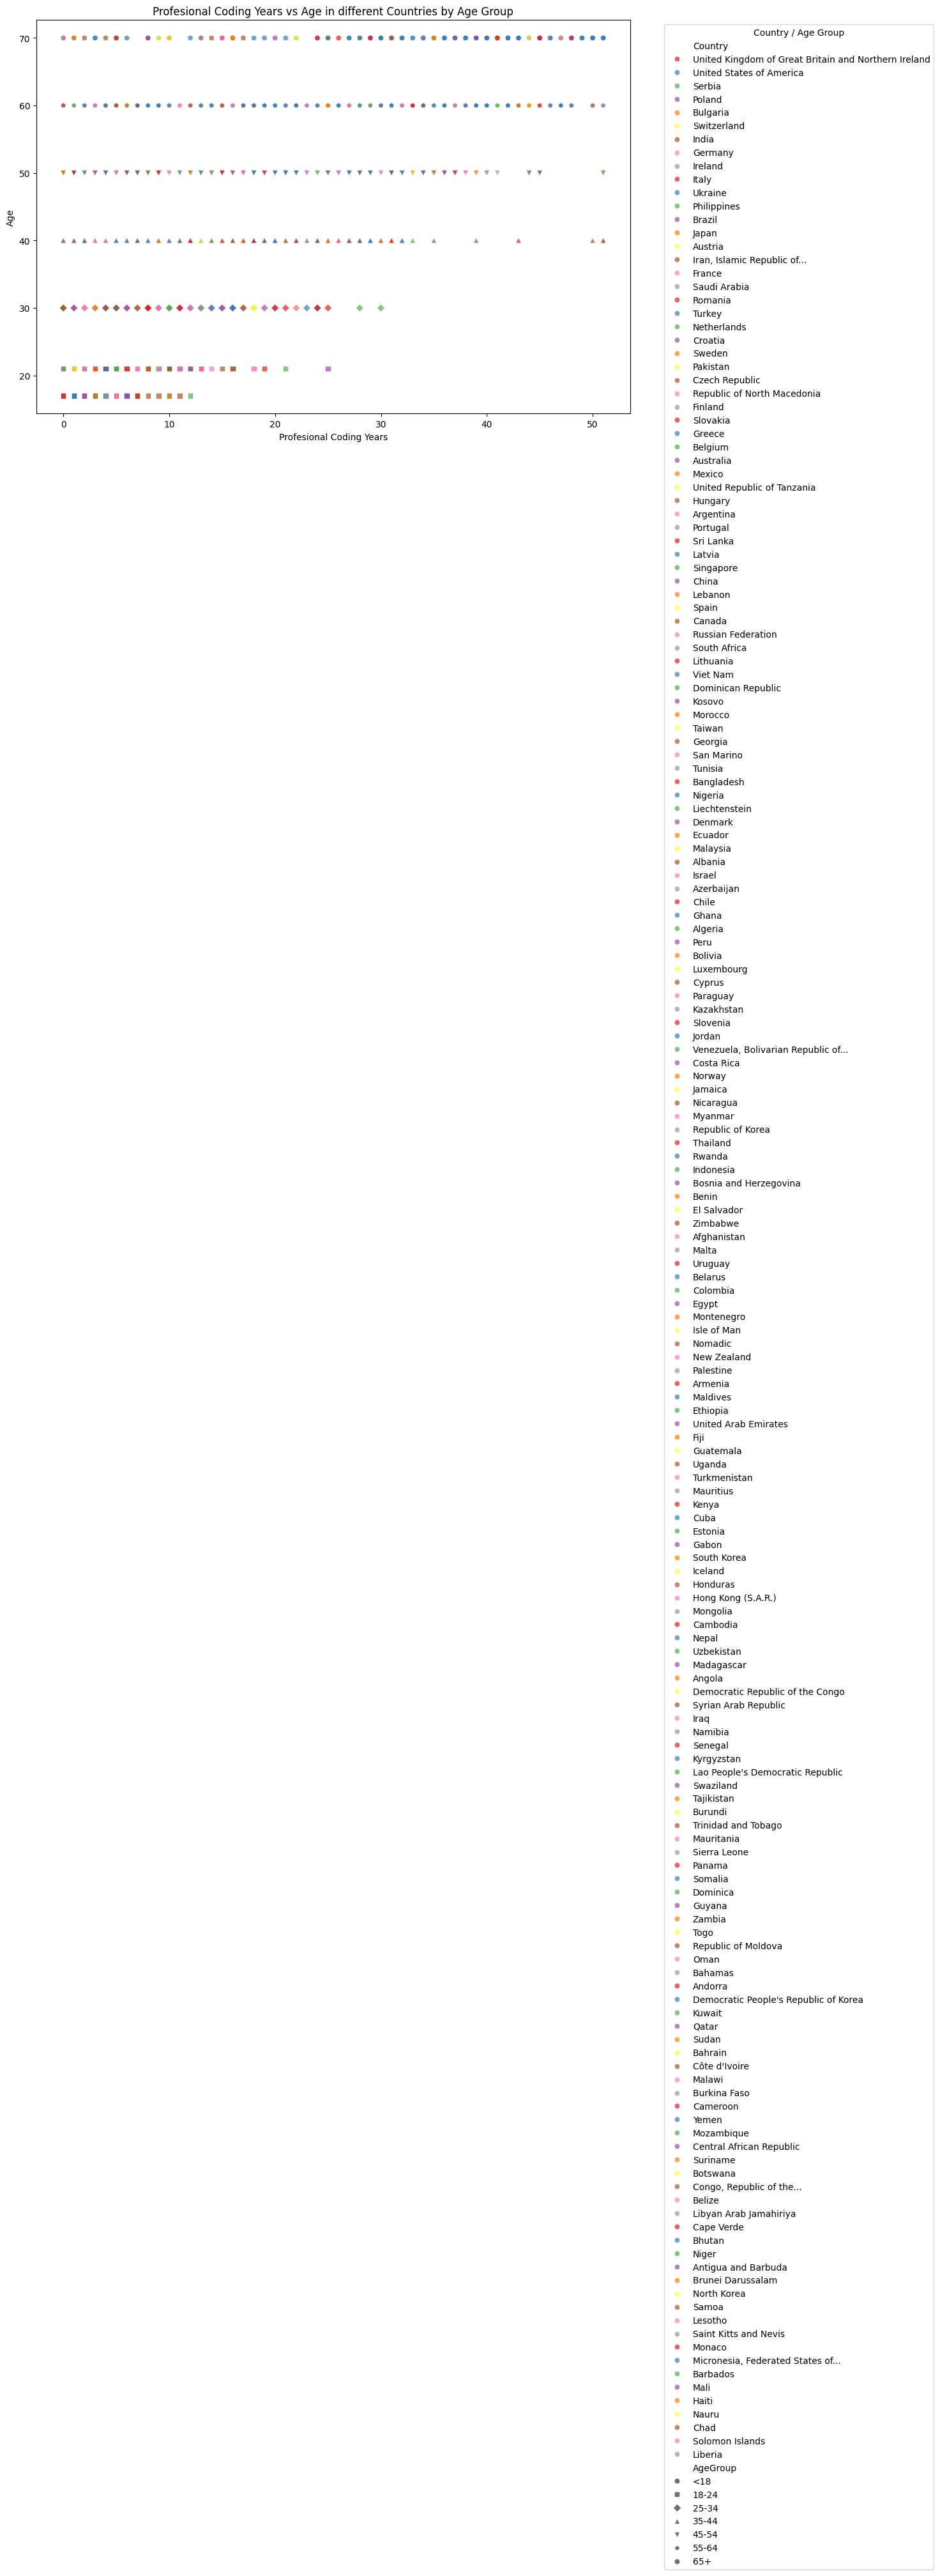

In [11]:
#this df had already the numeric values 
df_combined = df_years_code.copy()

#Adding country column
df_combined['Country'] = df['Country']

#create Age Group
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_combined['AgeGroup'] = pd.cut(df_combined['Age'], bins=bins, labels=labels, right=False)

#create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_combined, x='YearsCodePro', y='Age', hue='Country', style='AgeGroup', palette='Set1', markers=['o', 's', 'D', '^', 'v', 'p'], alpha=0.7)

plt.xlabel('Profesional Coding Years')
plt.ylabel('Age')
plt.title('Profesional Coding Years vs Age in different Countries by Age Group')

plt.legend(title='Country / Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
